In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'serif', 'serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick
from scipy.ndimage import zoom

In [2]:
src_path = "../size_64/n_element_2/density_n_element_2.h5"
with h5py.File(src_path, "r") as s:
    src_densities = s["sample/densities"][...]
    src_elements = s["sample/elements"][...]

In [3]:
trg_path = "density_n_element_2.h5"
sample_height_n = 32
sample_size_n = 32
n = 2

with h5py.File(trg_path, "w") as s:
    sample = s.create_group("sample")
    sample_v = sample.create_dataset("densities", shape=(n, sample_height_n, sample_size_n, sample_size_n), dtype="f4")
    sample_e = sample.create_dataset("elements", shape=(n,), dtype='S5')
    sample_e[...] = src_elements

    
with h5py.File(trg_path, "r+") as s:
    trg_densities = s["sample/densities"]
    for element in range(n):
        trg_densities[element] = zoom(src_densities[element], (0.5,0.5,0.5))
        

with h5py.File(trg_path, "r") as s:
    grid = s["sample/densities"][...]
    elements = s["sample/elements"][...]
    print(elements)
    
print(grid.shape)
layer_idx_ls = np.arange(0,32,8)
image_size = grid.shape[-1]
print(np.max(grid))

[b'Ca' b'Sc']
(2, 32, 32, 32)
3.407375


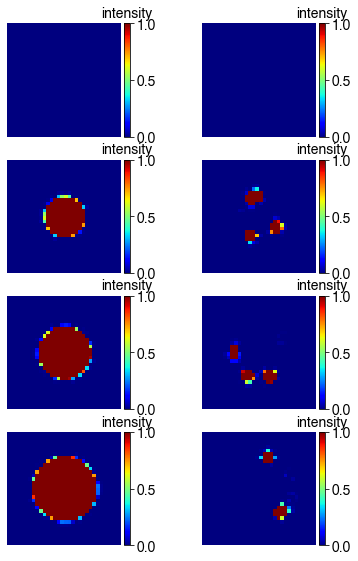

In [4]:
fig6 = plt.figure(figsize=(4 * grid.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = grid.shape[0], width_ratios=[1] * grid.shape[0])

for element_idx in range(grid.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(grid[element_idx,layer_idx], cmap='jet', vmin=0, vmax=1.0, extent=[0, 64, 64, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.arange(0,3.0,0.5)
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')